In [1]:
#Importing necessary 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.sample(5)

,age,sex,bmi,children,smoker,region,charges
693,24,male,23.655,0,no,northwest,2352.96845
548,25,female,28.595,0,no,northeast,3213.62205
502,51,male,23.210,1,yes,southeast,22218.11490
842,23,female,32.780,2,yes,southeast,36021.01120
821,26,male,17.670,0,no,northwest,2680.94930


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

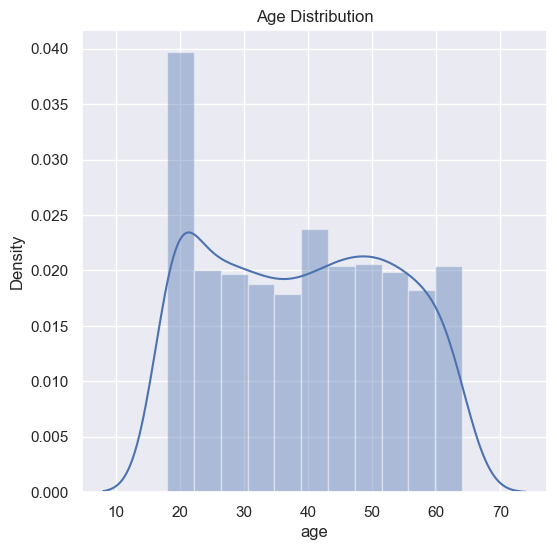

In [8]:
#disrbution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

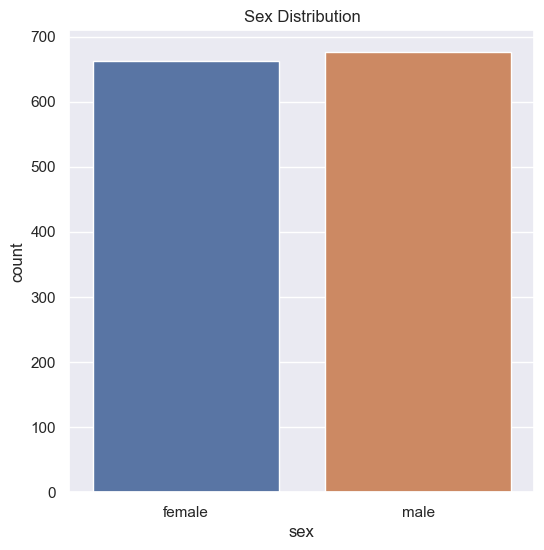

In [9]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title("Sex Distribution")
plt.show()

In [10]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

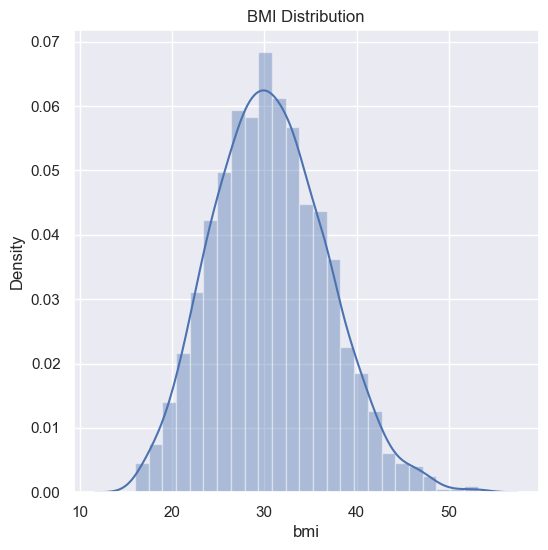

In [11]:
#disrbution of bmi
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [12]:
#Normal BMI  range --> 18.5 to 24.9

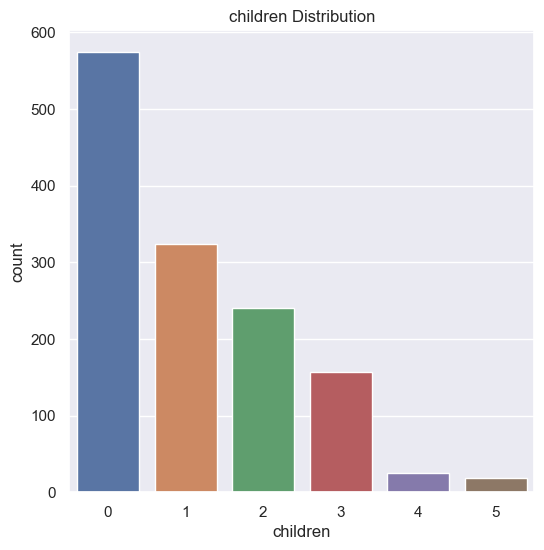

In [13]:
#Countplot for children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title("children Distribution")
plt.show()

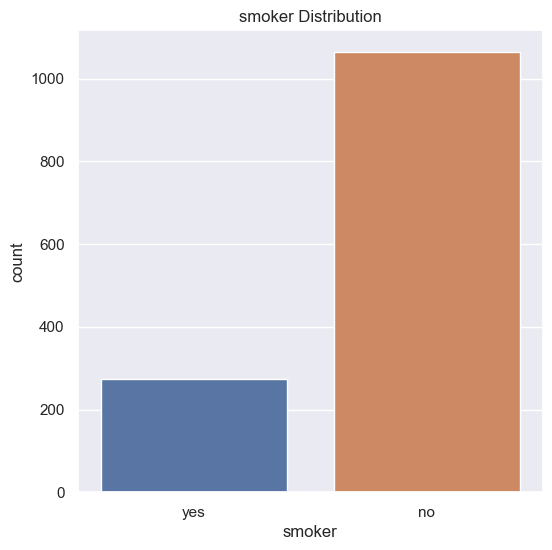

In [14]:
#distribution for smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title("smoker Distribution")
plt.show()


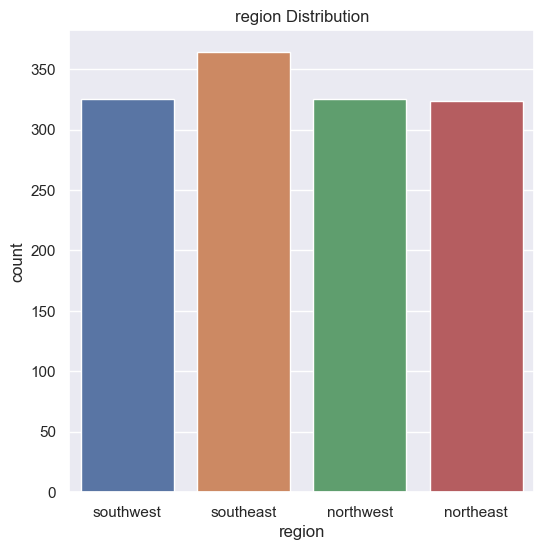

In [15]:
'''# Count occurrences of each unique value in the 'region' column
region_counts = insurance_data['region'].value_counts()
# Define custom colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Explode a slice
explode = (0.1,0, 0, 0)  # only "explode" the 1st slice

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(region_counts, labels=region_counts.index, explode=explode, colors=colors,autopct='%1.1f%%', startangle=140,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Region Distribution')
plt.show()'''



#Countplot for region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title("region Distribution")
plt.show()

In [16]:
#encoding the sex column
insurance_data.replace({'sex':{'female':0, 'male':1}},inplace = True)

#encoding the smoker
insurance_data.replace({'smoker':{'no':0 ,'yes':1}},inplace = True)

#encoding the region
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2,'northwest':3}},inplace = True)


In [17]:
input_data = insurance_data.drop(columns ='charges')
output_data = insurance_data['charges']

In [18]:
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data,output_data , test_size = 0.2, random_state= 2)

In [19]:
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(1338, 6) (1070, 6) (268, 6)


In [20]:
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(1338,) (1070,) (268,)


In [21]:
# Model creation 

model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [22]:
#Training the model 

model.fit(input_train_data,output_train_data)


RandomForestRegressor(max_depth=7)

In [23]:
#prediction on training data
test_data_prediction = model.predict(input_test_data)

In [24]:
#performance metrice
# R squared value
from sklearn.metrics import r2_score
r2_score(test_data_prediction ,output_test_data)

0.8260690328719782

In [25]:
#age	sex	bmi	children	smoker	region	charges
#44	female	20.235	1	yes	northeast	19594.80965
#25	female	20.800	1	no	southwest	3208.78700

input_data = (25,0,20.800,1,1,1)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)


In [26]:
insurance_premium = model.predict(input_data_array)

In [27]:
insurance_premium[0]

15625.012252270968

In [28]:
import pickle as pkl

In [29]:
pkl.dump(model ,open('MIPML.pkl','wb'))